# Example usage of Orca with XYZ files

You can still use molobjs (or ppqm functions) directly, if you have XYZ files to compute.


In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
import logging
import sys

In [3]:
import pandas as pd
from rdkit import Chem
from rdkit.Chem.Draw import MolsToGridImage

In [4]:
try:
    import ppqm
except ModuleNotFoundError:
    import pathlib

    cwd = pathlib.Path().resolve().parent
    sys.path.append(str(cwd))
    import ppqm

In [5]:
from ppqm import jupyter as ppqm_jupyter

In [6]:
import rmsd

## Set logging level

In [7]:
logging.basicConfig(stream=sys.stdout, level=logging.INFO)
logging.getLogger("ppqm").setLevel(logging.INFO)
logging.getLogger("orca").setLevel(logging.DEBUG)
show_progress = True

## Load a XYZ file

In [8]:
filename = "../tests/resources/compounds/methane.xyz"

In [9]:
atoms, coordinates = rmsd.get_coordinates_xyz(filename)

In [10]:
atoms

array(['C', 'H', 'H', 'H', 'H'], dtype='<U1')

In [11]:
charge = 0
spin = 1

## View the molecule

Note that no explict bonds are written in XYZ format, only the coordinates.
So RDKit does not now how the graph of the molecule looks like


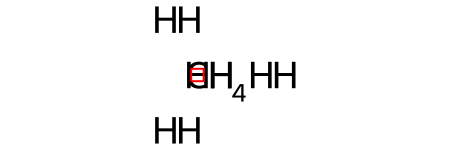

In [12]:
molobj = ppqm.chembridge.axyzc_to_molobj(atoms, coordinates, charge)
molobj

In [13]:
ppqm_jupyter.show_molobj(molobj)

interactive(children=(IntSlider(value=0, description='idx', max=0), Output()), _dom_classes=('widget-interact'…

NGLWidget()

## Set Orca Settings

In [14]:
orca_options = {
    "scr": "./_tmp_directory_",  # Where should the calculations happen?
    "cmd": "orca",  # What is the executable?
    "n_cores": 1,  # How many cores to use? Currently, only single core implemented
    "memory": 2, # How much memory to use?
    "show_progress": show_progress
}

## Calculate some properties

We can now define calculation options and get Orca properties for each conformer in the molobj.


In [15]:
# Optimize molecule in water
calculation_option = {
    "B3LYP": None,
    "def2-SVP": None,
    "D3BJ": None,
    "Hirshfeld": None,
    "CPCM": "water",
    "RIJCOSX": None,
    "def2/J": None,
    "Grid4": None,
    "GridX4": None,
    "NMR": None,
    "def2/JK": None
}

Optimize molobj and set resulting coordinates. The `.calculate` function will return a `List[Dict]` with a property dictionary for each conformer.

In [16]:
molecule_properties = ppqm.orca.get_properties_from_axyzc(
    atoms, coordinates, charge, spin, options=calculation_option, **orca_options
)

DEBUG:orca:orca _tmp_orca_input.inp


In [17]:
list(molecule_properties.keys())
print(molecule_properties)

{'scf_energy': -25385.226817175848, 'mulliken_charges': [-0.123718, 0.031994, 0.030769, 0.030478, 0.030478], 'loewdin_charges': [-0.110311, 0.027767, 0.02754, 0.027502, 0.027502], 'hirshfeld_charges': [-0.109466, 0.027435, 0.027324, 0.027346, 0.027346], 'shielding_constants': [196.724, 31.43, 31.432, 31.432, 31.432]}


In [18]:
energy = molecule_properties["scf_energy"]
print(f"The energy was {energy:.2f} kcal/mol")

The energy was -25385.23 kcal/mol
